We need to load the transformed video games data into PostgreSQL Database in this step.Following steps need to be in the Load phase 


*   Create a SQL script for table creation according to schema provided in ERD diagram in PostgreSQL
* Split the transformed data based on the SQL schema designed above
*  Connect to PostgreSQL from Colab and dump the data from dataframes into respective tables .




# Table Creation in Postgresql database based on Schema Creation

**NOTE=>** This step needs to be done in PostgreSQL pgadmin (not in colab notebook) Below is just a description of what you have to do.

**IMPORTANT NOTE**<br>
For working with a dataset in SQL database we usually do not load the entire data into the database in one table. For eg. we can not just load the entire transformed dataset in one table in SQL. 

The reason is related to the concept of data normalization. Basically it reduces data redundancy and helps in writing more efficient sql queries. (please watch this video to understand in more detail what is data normalization -  https://www.youtube.com/watch?v=xoTyrdT9SZI&ab_channel=Studytonight)

This is the reason firstly we will create a SQL table schema basically a set of multiple related tables which will contain the entire data of transformed dataframe. 

Once we create table based on this SQL table schema then we can do the further loading process.

Use the following ERD diagram to create the noromalized tables.


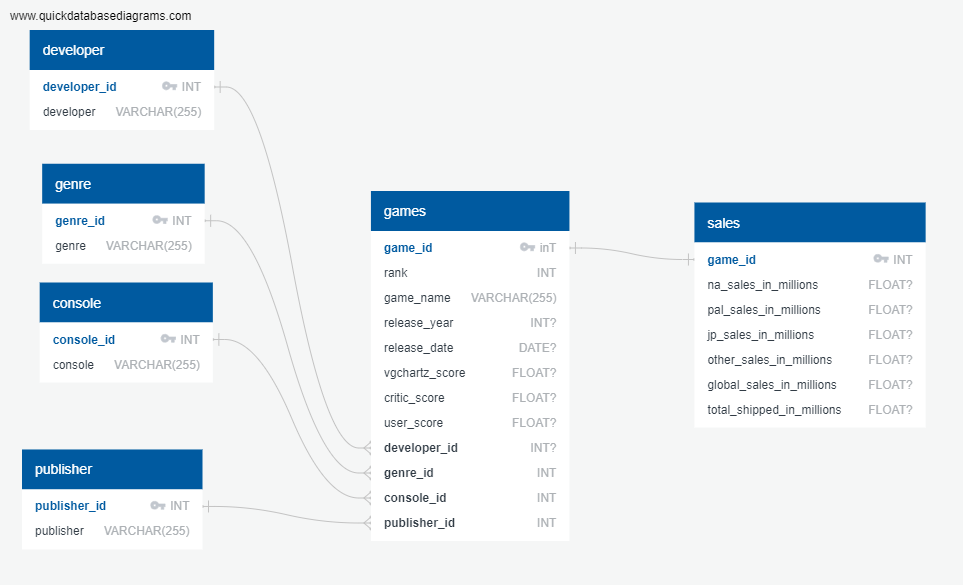

First, log in to the PostgreSQL database server using any client tool such as pgAdmin or psql.

Second, use the following statement to create a new database named Video_games in the PostgreSQL database server.
```sql
CREATE DATABASE Video_games;
```

Create a sql script like one here([link text](https://drive.google.com/file/d/1JaOICTP5BehQkpe3pX3kEA2oxdA42xd5/view?usp=sharing)) to add the tables(empty) required in your database in PostgreSQL. 

 

**NOTE=>** the tables that you create here are empty tables they just have the schema and relationship information in them. In the next few steps you will dump your transformed data into these tables.

# Splitting transformed data into multiple dataframes

Next split the transformed video games data  into multiple dataframes

Read Video Games Data from CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s "/content/drive/MyDrive/SQL_PROJECT" "/content"

In [ ]:
import os
import pandas as pd
# Set CSV file path
path = os.path.join('/content/SQL_PROJECT', 'Transformed_video_games_data.csv')
# Read games data from CSV file into Dataframe
transformed_df = pd.read_csv(path)

In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55217 entries, 0 to 55216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rank                       55217 non-null  int64  
 1   game_name                  55217 non-null  object 
 2   Console                    55217 non-null  object 
 3   Publisher                  55217 non-null  object 
 4   Developer                  55206 non-null  object 
 5   VGChartz Score             903 non-null    float64
 6   Critic Score               6527 non-null   float64
 7   User Score                 383 non-null    float64
 8   total_shipped_in_millions  2111 non-null   float64
 9   global_sales_in_millions   19110 non-null  float64
 10  na_sales_in_millions       12816 non-null  float64
 11  pal_sales_in_millions      12995 non-null  float64
 12  jp_sales_in_millions       6851 non-null   float64
 13  other_sales_in_millions    15311 non-null  flo

In [ ]:
transformed_df['User Score'].notnull().sum()

383

Create Genre dataframe

In [ ]:
transformed_df.rename({"Genre":"genre","Console":"console","Publisher":"publisher","Developer":"developer"},axis=1,inplace=True)

In [ ]:
# Generate list of unique genres
transformed_df['genre'].unique()

array(['Action', 'Action-Adventure', 'Adventure', 'Board Game',
       'Education', 'Fighting', 'Misc', 'MMO', 'Music', 'Party',
       'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Sandbox',
       'Shooter', 'Simulation', 'Sports', 'Strategy', 'Visual Novel'],
      dtype=object)

In [ ]:
# Generate list of genre ids
genre_df=pd.DataFrame(transformed_df['genre'].unique()).reset_index().rename({'index':'genre_id',0:"genre"},axis=1)

In [ ]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre_id  20 non-null     int64 
 1   genre     20 non-null     object
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


After this step the dataframe should look like this:
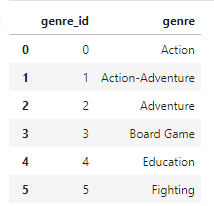

Similartly create developer dataframe

In [ ]:
transformed_df['developer'].unique()

array(['SIE Santa Monica Studio', 'Omega Force', 'Capcom', ...,
       'Different Tales', '4D Door Games', 'InvertMouse'], dtype=object)

In [ ]:
developer_df=pd.DataFrame(transformed_df['developer'].unique()).reset_index().rename({'index':'developer_id',0:"developer"},axis=1)

In [ ]:
developer_df=developer_df[developer_df.developer.notnull()].copy()

In [ ]:
developer_df['developer'].isnull().sum()

0

Create Console dataframe

In [ ]:
transformed_df['console'].unique()

array(['Series', 'PS3', 'PS4', 'PS2', 'X360', 'PC', 'XOne', 'PS', 'PSP',
       'Wii', 'DS', '3DS', 'NES', 'GC', 'WiiU', 'XB', 'All', 'NS', 'N64',
       'GEN', '2600', 'GBA', 'GB', 'PSV', 'SNES', 'DC', 'SAT', 'XBL',
       'PSN', 'And', 'DSiW', 'OSX', 'Lynx', 'SCD', 'Linux', 'MS', 'WW',
       'ZXS', 'ACPC', 'Amig', '7800', 'VC', 'GG', 'PCE', '5200', 'AJ',
       'WinP', 'Mob', 'iOS', 'WS', 'NG', '3DO', 'VB', 'GBC', 'Ouya',
       'NGage', 'AST', 'MSD', 'S32X', 'PCFX', 'Int', 'PS5', 'XS', 'CDi',
       'C128', 'DSi', 'Arc', 'C64', 'BRW', 'FMT', 'MSX', 'GIZ', 'ApII',
       'Aco', 'BBCM', 'TG16', 'CD32', 'CV'], dtype=object)

In [ ]:
console_df=pd.DataFrame(transformed_df['console'].unique()).reset_index().rename({'index':'console_id',0:"console"},axis=1)
console_df

,console_id,console
0,0,Series
1,1,PS3
2,2,PS4
3,3,PS2
4,4,X360
...,...,...
73,73,Aco
74,74,BBCM
75,75,TG16
76,76,CD32


Create Publisher dataframe

In [ ]:
publisher_df=pd.DataFrame(transformed_df['publisher'].unique()).reset_index().rename({'index':'publisher_id',0:"publisher"},axis=1)
publisher_df

,publisher_id,publisher
0,0,Sony Computer Entertainment
1,1,KOEI
2,2,Capcom
3,3,Rockstar Games
4,4,Konami
...,...,...
3287,3287,bch waves studio
3288,3288,Mighty Rabbit Studios
3289,3289,Mind's Eclipse Interactive
3290,3290,Walkabout


Create Games dataframe

In [ ]:
df1=pd.merge(transformed_df,genre_df,on="genre")
df2=pd.merge(df1,developer_df,on="developer")
df3=pd.merge(df2,console_df,on="console")
df4=pd.merge(df3,publisher_df,on="publisher")

In [ ]:
df5=df4.reset_index().rename({'index':'games_id'},axis=1)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55206 entries, 0 to 55205
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   games_id                   55206 non-null  int64  
 1   rank                       55206 non-null  int64  
 2   game_name                  55206 non-null  object 
 3   console                    55206 non-null  object 
 4   publisher                  55206 non-null  object 
 5   developer                  55206 non-null  object 
 6   VGChartz Score             903 non-null    float64
 7   Critic Score               6527 non-null   float64
 8   User Score                 383 non-null    float64
 9   total_shipped_in_millions  2111 non-null   float64
 10  global_sales_in_millions   19107 non-null  float64
 11  na_sales_in_millions       12814 non-null  float64
 12  pal_sales_in_millions      12993 non-null  float64
 13  jp_sales_in_millions       6851 non-null   flo

In [ ]:
games_df=df5[['games_id',"rank","game_name","release_year","release_date","VGChartz Score",\
              "Critic Score","User Score","developer_id","genre_id","console_id","publisher_id"]]

In [ ]:
games_df.isnull().sum()

games_id              0
rank                  0
game_name             0
release_year          0
release_date          0
VGChartz Score    54303
Critic Score      48679
User Score        54823
developer_id          0
genre_id              0
console_id            0
publisher_id          0
dtype: int64

Create Sales dataframe

In [ ]:
sales_df=df5[["games_id","na_sales_in_millions",'pal_sales_in_millions',"jp_sales_in_millions",\
              "other_sales_in_millions","global_sales_in_millions","total_shipped_in_millions"]].copy()
sales_df.head()

,games_id,na_sales_in_millions,pal_sales_in_millions,jp_sales_in_millions,other_sales_in_millions,global_sales_in_millions,total_shipped_in_millions
0,0,NaN,NaN,NaN,NaN,NaN,51.00
1,1,NaN,NaN,NaN,NaN,NaN,20.00
2,2,NaN,NaN,NaN,NaN,NaN,12.00
3,3,NaN,NaN,NaN,NaN,NaN,50.00
4,4,NaN,NaN,NaN,NaN,NaN,44.25


In [ ]:
sales_df['na_sales_in_millions'].notnull().sum()

12814

#LOAD these dataframes into PostgreSQL

In this step we will load the dataframes created above from transformed data and load into the table created in STEP 1.

Connect to the PostgreSQL database server from the colab  using the psycopg database adapter.


To connect to the Video_games database, you use the connect() function of the psycopg2 module.The connection class of the psycopg2 represents/handles an instance of a connection. You can create new connections using the connect() function. This accepts the basic connection parameters such as dbname, user, password, host, port and returns a connection object. Using this function, you can establish a connection with the PostgreSQL.


Follow this link for more info [link text](https://www.postgresqltutorial.com/postgresql-python/connect/)


In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
developer_df=pd.read_csv("E:\incredible\SQL\SQL_Final_project\SPLIT_FILE_WITH_COLUMN\developer_data.csv")
developer_df.head()

Load Genre Dataframe into PostgreSQL

In [ ]:
param_dic = {
    "host"      : "localhost",
    "database"  : "video_games", 
    "user"      : "postgres",
    "password"  : "KARAN1996" 
}

try:
    connect = "postgresql+psycopg2://%s:%s@%s:5432/%s" % (
        param_dic['user'],
        param_dic['password'],
        param_dic['host'],
        param_dic['database']
    )

    engine = create_engine(connect)
    print("Connection established...")
    
    # Write data from Dataframe into Database Tables
    developer_df.to_sql(
        'developer', 
        con=engine,
        if_exists='append',
        index=False
    )
    print("Inserted data from Console Dataframe into console table...")

except:
    print("Error while connecting/writing/reading PostgreSQL")

Similarly load other dataframes into PostgreSQL for further analysis.

Write the Dataframes into CSV files

In [ ]:
genre_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/genre_data.csv', index=False)
console_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/console_data.csv', index=False)
publisher_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/publisher_data.csv', index=False)
developer_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/developer_data.csv', index=False)
games_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/games_data.csv', index=False)
sales_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/sales_data.csv', index=False)

NameError: ignored

In [ ]:
genre_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/genre_data.csv', index=False,header=False)
console_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/console_data.csv', index=False,header=False)
publisher_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/publisher_data.csv', index=False,header=False)
developer_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/developer_data.csv', index=False,header=False)
games_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/games_data.csv', index=False,header=False)
sales_df.to_csv('/content/SQL_PROJECT/SPLIT_FILE_WITHOUT_COLUMN/sales_data.csv', index=False,header=False)

In [ ]:
data=pd.read_csv('/content/SQL_PROJECT/SPLIT_FILE_WITH_COLUMN/sales_data.csv')

In [ ]:
data.notnull().sum()

games_id                     55206
na_sales_in_millions         12814
pal_sales_in_millions        12993
jp_sales_in_millions          6851
other_sales_in_millions      15308
global_sales_in_millions     19107
total_shipped_in_millions     2111
dtype: int64